# LASSO解决多重共线性问题   （特征之间存在高度相关的关系）

In [4]:
from sklearn.linear_model import LassoCV #采用交叉验证lasso法
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('../breast_cancer_m.csv')
x=data.iloc[:,:-1]
y=data['label']
x.shape

(569, 30)

In [6]:
alphas=np.logspace(-10,-1,100,base=10) #选-10 到-1之间的100个以log10为底的对数 这里的alpha是lasso损失函数中的截距前面的系数λ
alphas

array([1.00000000e-10, 1.23284674e-10, 1.51991108e-10, 1.87381742e-10,
       2.31012970e-10, 2.84803587e-10, 3.51119173e-10, 4.32876128e-10,
       5.33669923e-10, 6.57933225e-10, 8.11130831e-10, 1.00000000e-09,
       1.23284674e-09, 1.51991108e-09, 1.87381742e-09, 2.31012970e-09,
       2.84803587e-09, 3.51119173e-09, 4.32876128e-09, 5.33669923e-09,
       6.57933225e-09, 8.11130831e-09, 1.00000000e-08, 1.23284674e-08,
       1.51991108e-08, 1.87381742e-08, 2.31012970e-08, 2.84803587e-08,
       3.51119173e-08, 4.32876128e-08, 5.33669923e-08, 6.57933225e-08,
       8.11130831e-08, 1.00000000e-07, 1.23284674e-07, 1.51991108e-07,
       1.87381742e-07, 2.31012970e-07, 2.84803587e-07, 3.51119173e-07,
       4.32876128e-07, 5.33669923e-07, 6.57933225e-07, 8.11130831e-07,
       1.00000000e-06, 1.23284674e-06, 1.51991108e-06, 1.87381742e-06,
       2.31012970e-06, 2.84803587e-06, 3.51119173e-06, 4.32876128e-06,
       5.33669923e-06, 6.57933225e-06, 8.11130831e-06, 1.00000000e-05,
      

In [7]:
select_lasso=LassoCV(alphas=alphas,cv=5,max_iter=1000000)#实例化五折lasso （在做lasso之间，理论上应该先做无量纲化）
#五折交叉验证即 把数据集划分为5份，4份做训练集，1份做验证集，依次将每份换着换着当验证集，剩下当训练集来训练
select_lasso.fit(x,y)

LassoCV(alphas=array([1.00000000e-10, 1.23284674e-10, 1.51991108e-10, 1.87381742e-10,
       2.31012970e-10, 2.84803587e-10, 3.51119173e-10, 4.32876128e-10,
       5.33669923e-10, 6.57933225e-10, 8.11130831e-10, 1.00000000e-09,
       1.23284674e-09, 1.51991108e-09, 1.87381742e-09, 2.31012970e-09,
       2.84803587e-09, 3.51119173e-09, 4.32876128e-09, 5.33669923e-09,
       6.57933225e-09, 8.11130831e-0...
       8.11130831e-04, 1.00000000e-03, 1.23284674e-03, 1.51991108e-03,
       1.87381742e-03, 2.31012970e-03, 2.84803587e-03, 3.51119173e-03,
       4.32876128e-03, 5.33669923e-03, 6.57933225e-03, 8.11130831e-03,
       1.00000000e-02, 1.23284674e-02, 1.51991108e-02, 1.87381742e-02,
       2.31012970e-02, 2.84803587e-02, 3.51119173e-02, 4.32876128e-02,
       5.33669923e-02, 6.57933225e-02, 8.11130831e-02, 1.00000000e-01]),
        cv=5, max_iter=1000000)

In [8]:
select_lasso.alpha_#得出最佳的alpha值

0.0001232846739442066

In [9]:
select_lasso.coef_#最佳alpha值下的各个特征的系数 系数为0表示被lasso筛除了

array([ 9.28386690e-02, -1.09284401e-02, -3.19892656e-03, -5.18433560e-04,
       -0.00000000e+00,  1.81066796e+00, -6.10306903e-01, -1.36400818e+00,
       -0.00000000e+00, -0.00000000e+00, -4.46746222e-01, -2.88715264e-02,
       -4.14055570e-04,  1.63609320e-03, -0.00000000e+00, -0.00000000e+00,
        1.47229778e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.83477531e-01, -1.89194628e-03,  3.70637264e-03,  9.32890159e-04,
       -1.87366322e+00, -0.00000000e+00, -3.50877977e-01, -1.36881656e+00,
       -5.76315402e-01, -5.96704259e-01])

In [10]:
x.columns[select_lasso.coef_!=0]#塞选出的特征

Index(['A', 'B', 'C', 'D', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'Q', 'U', 'V',
       'W', 'X', 'Y', 'AA', 'AB', 'AC', 'AD'],
      dtype='object')

In [11]:
x[x.columns[select_lasso.coef_!=0]]#塞选出的特征数据列

,A,B,C,D,F,G,H,K,L,M,...,Q,U,V,W,X,Y,AA,AB,AC,AD
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,0.9053,8.589,...,0.05373,25.380,17.33,184.60,2019.0,0.16220,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,0.7339,3.398,...,0.01860,24.990,23.41,158.80,1956.0,0.12380,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,0.7869,4.585,...,0.03832,23.570,25.53,152.50,1709.0,0.14440,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,1.1560,3.445,...,0.05661,14.910,26.50,98.87,567.7,0.20980,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,0.7813,5.438,...,0.05688,22.540,16.67,152.20,1575.0,0.13740,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,1.2560,7.673,...,0.05198,25.450,26.40,166.10,2027.0,0.14100,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,2.4630,5.203,...,0.03950,23.690,38.25,155.00,1731.0,0.11660,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,1.0750,3.425,...,0.04730,18.980,34.12,126.70,1124.0,0.11390,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,1.5950,5.772,...,0.07117,25.740,39.42,184.60,1821.0,0.16500,0.9387,0.2650,0.4087,0.12400


In [12]:
select_lasso.intercept_#最佳alpha值下的截距

2.728985220683432

In [13]:
select_lasso.mse_path_.shape#不同alpha下的均方误差 100表示100个alpha 5表示采用的五折交叉验证 每一折的结果

(100, 5)

In [14]:
select_lasso.mse_path_

array([[0.12364069, 0.08667903, 0.06432555, 0.06389331, 0.08035201],
       [0.12254879, 0.08627165, 0.06448354, 0.06363644, 0.08089413],
       [0.1217032 , 0.0859679 , 0.06464336, 0.06345465, 0.08136402],
       [0.12105057, 0.08574133, 0.06483903, 0.06332451, 0.08176494],
       [0.12054311, 0.08557075, 0.06506858, 0.06320793, 0.08210315],
       [0.12014591, 0.08530452, 0.06527478, 0.06311683, 0.08236525],
       [0.11983398, 0.08506071, 0.06545543, 0.06305468, 0.08250103],
       [0.11949743, 0.08487914, 0.06561084, 0.06277856, 0.08223736],
       [0.11921922, 0.08392398, 0.06495551, 0.06274127, 0.08166228],
       [0.11770336, 0.08232222, 0.06393886, 0.06290397, 0.08135866],
       [0.11637723, 0.08132289, 0.06318847, 0.06314211, 0.08120439],
       [0.11579606, 0.07922895, 0.06088654, 0.06302541, 0.07954696],
       [0.11112151, 0.07613564, 0.05958075, 0.05991797, 0.07764686],
       [0.10757659, 0.07394095, 0.05857941, 0.05735501, 0.07646557],
       [0.10419667, 0.07270664, 0.

In [15]:
select_lasso.mse_path_.mean(axis=1) #表示按行求均值 即五折的平均值

array([0.08377812, 0.08356691, 0.08342663, 0.08334408, 0.0832987 ,
       0.08324146, 0.08318117, 0.08300066, 0.08250045, 0.08164541,
       0.08104702, 0.07969678, 0.07688055, 0.0747835 , 0.07286032,
       0.07165118, 0.070867  , 0.07033441, 0.06994826, 0.06956855,
       0.06909208, 0.06827576, 0.06770477, 0.06735752, 0.06679353,
       0.06627262, 0.06587495, 0.06552945, 0.06501757, 0.06455274,
       0.0641082 , 0.06373264, 0.06357104, 0.06360906, 0.06374626,
       0.06386936, 0.06396849, 0.06403557, 0.0640815 , 0.06407688,
       0.06404878, 0.06401929, 0.06399797, 0.06396566, 0.06390367,
       0.06389323, 0.06390773, 0.06392127, 0.0639438 , 0.06396352,
       0.06397935, 0.06400353, 0.06402614, 0.06404746, 0.06407149,
       0.06409945, 0.06412268, 0.0641419 , 0.06415773, 0.06417055,
       0.06418081, 0.06418935, 0.06419633, 0.06420202, 0.06420665,
       0.06421042, 0.06421349, 0.06421598, 0.064218  , 0.06421965,
       0.06422099, 0.06422207, 0.06422295, 0.06422366, 0.06422

In [16]:
select_lasso.alphas #所有alpha列表（顺序反着来的）

array([1.00000000e-10, 1.23284674e-10, 1.51991108e-10, 1.87381742e-10,
       2.31012970e-10, 2.84803587e-10, 3.51119173e-10, 4.32876128e-10,
       5.33669923e-10, 6.57933225e-10, 8.11130831e-10, 1.00000000e-09,
       1.23284674e-09, 1.51991108e-09, 1.87381742e-09, 2.31012970e-09,
       2.84803587e-09, 3.51119173e-09, 4.32876128e-09, 5.33669923e-09,
       6.57933225e-09, 8.11130831e-09, 1.00000000e-08, 1.23284674e-08,
       1.51991108e-08, 1.87381742e-08, 2.31012970e-08, 2.84803587e-08,
       3.51119173e-08, 4.32876128e-08, 5.33669923e-08, 6.57933225e-08,
       8.11130831e-08, 1.00000000e-07, 1.23284674e-07, 1.51991108e-07,
       1.87381742e-07, 2.31012970e-07, 2.84803587e-07, 3.51119173e-07,
       4.32876128e-07, 5.33669923e-07, 6.57933225e-07, 8.11130831e-07,
       1.00000000e-06, 1.23284674e-06, 1.51991108e-06, 1.87381742e-06,
       2.31012970e-06, 2.84803587e-06, 3.51119173e-06, 4.32876128e-06,
       5.33669923e-06, 6.57933225e-06, 8.11130831e-06, 1.00000000e-05,
      

# 二、LASSO常用两幅图的绘制
1.误差棒图 errorbar

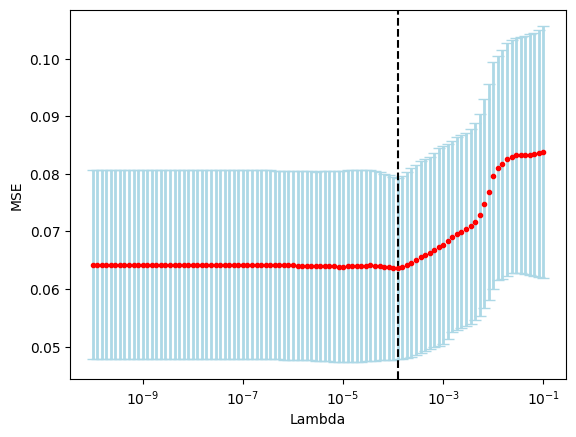

In [44]:
import matplotlib.pyplot as plt
MSEs_mean = select_lasso.mse_path_.mean(axis=1)
MSEs_std = select_lasso.mse_path_.std(axis=1)
# MSEs_mean=np.apply_along_axis(np.mean,1,select_lasso.mse_path_)另外的写法
# MSEs_std=np.apply_along_axis(np.std,1,select_lasso.mse_path_)
plt.figure()
plt.errorbar(select_lasso.alphas_,MSEs_mean#输入x，y
             ,yerr=MSEs_std#误差范围
             ,fmt='o'#曲线改为数据圆点标记
             ,ms=3#数据圆点大小
             ,mfc='r'#数据点颜色
             ,mec='r'#数据点边缘颜色
             ,ecolor='lightblue'#误差棒颜色
             ,elinewidth=2#误差棒宽度
             ,capsize=4#误差棒边界线长度
             ,capthick=1#误差棒边界线厚度
             )
plt.semilogx()#将x轴数值进行log转换
plt.axvline(select_lasso.alpha_,color='black',ls='--')#画一条竖线在最优值处
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()


2、 lassopath图


In [72]:
coefs=select_lasso.path(x,y,alphas=alphas,max_iter=1000000)[1].T #返回随着alpha变化的各个特征取值

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.41152155268511237, tolerance: 0.0357
  model = cd_fast.enet_coordinate_descent_gram(


In [73]:
coefs

array([[ 0.00000000e+00, -0.00000000e+00,  5.23079084e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.64844000e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.98714689e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 4.20048336e-01, -2.62156151e-03, -2.39141041e-02, ...,
        -5.76616244e-01, -6.78150474e-01, -5.85614581e+00],
       [ 4.20048318e-01, -2.62155707e-03, -2.39141020e-02, ...,
        -5.76615744e-01, -6.78150689e-01, -5.85614456e+00],
       [ 4.20048302e-01, -2.62155350e-03, -2.39141001e-02, ...,
        -5.76615333e-01, -6.78150866e-01, -5.85614346e+00]])

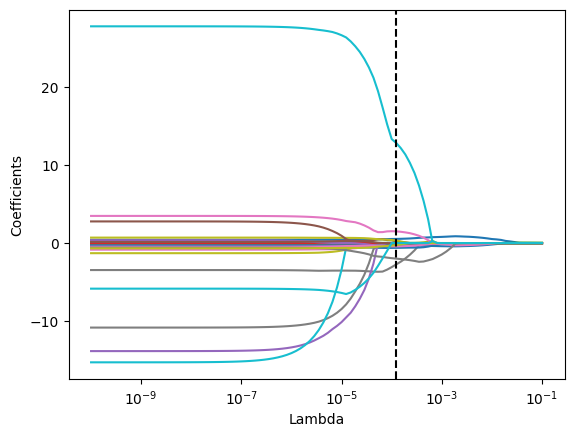

In [79]:
plt.figure()
plt.semilogx(select_lasso.alphas_,coefs,'-')
plt.axvline(select_lasso.alpha_,color='black',ls='--')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

# 有时候认为 最好的Lambda是在最小MSE一倍标准误差处的Lambda
（认为筛选后特征还是太多了，避免过拟合）

In [92]:
alpha_index=np.where(select_lasso.alphas_==select_lasso.alpha_)
print("最佳MSE的lambda的位置",alpha_index)
MSEs_mean_SE=MSEs_mean[alpha_index]+MSEs_std[alpha_index]
print('最小MSE一倍标准误差处', MSEs_mean_SE)
alpha_index_se=np.min(np.where(MSEs_mean<=MSEs_mean_SE))
print('最小MSE一倍标准误差处的Lambda的位置',alpha_index_se)
alpha_se=select_lasso.alphas_[alpha_index_se]
print('最佳Lambda的值',alpha_se)


最佳MSE的lambda的位置 (array([32]),)
最小MSE一倍标准误差处 [0.0792777]
最小MSE一倍标准误差处的Lambda的位置 12
最佳Lambda的值 0.008111308307896872


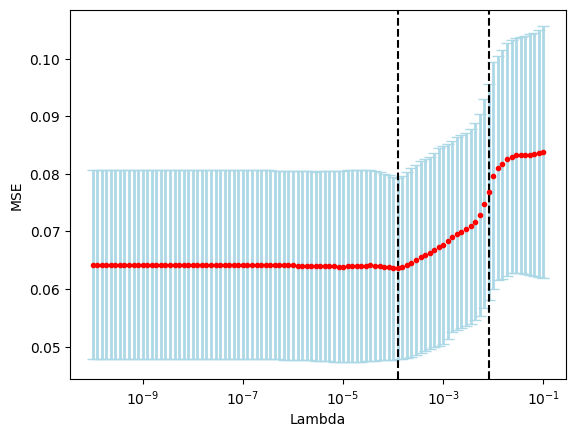

In [90]:
plt.figure()
plt.errorbar(select_lasso.alphas_, MSEs_mean  # 输入x，y
             , yerr=MSEs_std  # 误差范围
             , fmt='o'  # 曲线改为数据圆点标记
             , ms=3  # 数据圆点大小
             , mfc='r'  # 数据点颜色
             , mec='r'  # 数据点边缘颜色
             , ecolor='lightblue'  # 误差棒颜色
             , elinewidth=2  # 误差棒宽度
             , capsize=4  # 误差棒边界线长度
             , capthick=1  # 误差棒边界线厚度
             )
plt.semilogx()  # 将x轴数值进行log转换
plt.axvline(select_lasso.alpha_, color='black', ls='--')  # 画一条竖线在最优值处
plt.axvline(alpha_se, color='black', ls='--')  # 理论上一倍标准误差处的最优值
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()


# 选出最优alpha下的特征

In [98]:
select_lasso_se=LassoCV(alphas=[alpha_se],cv=5,max_iter=1000000)#用筛选好的alpha值（lambda）重新训练 这里写成[alpha_se]
# 是因为The 'alphas' parameter of LassoCV must be an array-like or None.
select_lasso_se.fit(x,y)

LassoCV(alphas=[0.008111308307896872], cv=5, max_iter=1000000)

In [100]:
x.columns[select_lasso_se.coef_!=0]#优化后筛选出的特征

Index(['A', 'B', 'D', 'M', 'N', 'U', 'V', 'W', 'X', 'AA'], dtype='object')